In [1]:
!pip install be-great

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from be_great import GReaT
from sklearn import datasets

In [11]:
data = datasets.fetch_california_housing(as_frame=True).frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
data.shape

(20640, 9)

In [16]:
#build and fit model
model = GReaT(llm='distilgpt2', batch_size=32, epochs=25)
trainer = model.fit(data)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.917300
1000,1.731500
1500,1.673000
2000,1.635300
2500,1.602700
3000,1.574600
3500,1.556800
4000,1.529500
4500,1.516600
5000,1.496300


Checkpoint destination directory trainer_great/checkpoint-500 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory trainer_great/checkpoint-1000 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory trainer_great/checkpoint-1500 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory trainer_great/checkpoint-2000 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory trainer_great/checkpoint-2500 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory trainer_great/checkpoint-3000 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Checkpoint destination directory trainer_great/checkpoint-3500 already exists and is non-empty. Savin

In [17]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 4155.9677,
 'train_samples_per_second': 124.159,
 'train_steps_per_second': 3.88,
 'total_flos': 1.1657615713763328e+16,
 'train_loss': 1.4649938491703003,
 'epoch': 25.0,
 'step': 16125}

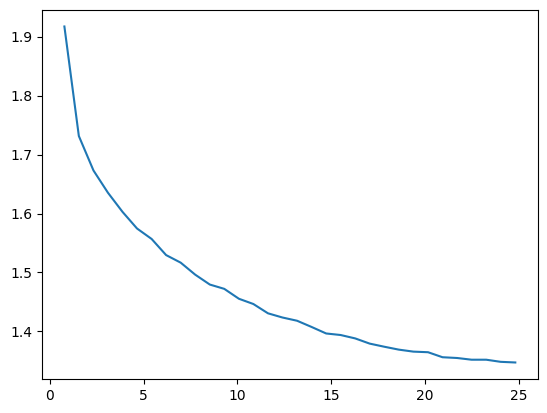

In [18]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

plt.plot(epochs, loss)

In [21]:
n_samples=20640
synthetic_data = model.sample(n_samples, k=50)

20679it [04:53, 70.57it/s]


In [22]:
synthetic_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.6129,5.0,5.764706,1.012059,975.0,2.555882,34.11,-118.39,3.81700
1,3.5000,25.0,4.979887,1.048023,736.0,1.796894,34.01,-118.45,5.00001
2,8.9063,16.0,6.250000,1.129032,667.0,2.384857,33.82,-117.32,5.00001
3,1.8972,32.0,4.627907,1.000000,488.0,2.652340,37.30,-121.41,0.68300
4,4.0284,52.0,4.955882,1.087368,2466.0,2.850000,37.72,-122.27,1.73400


In [23]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

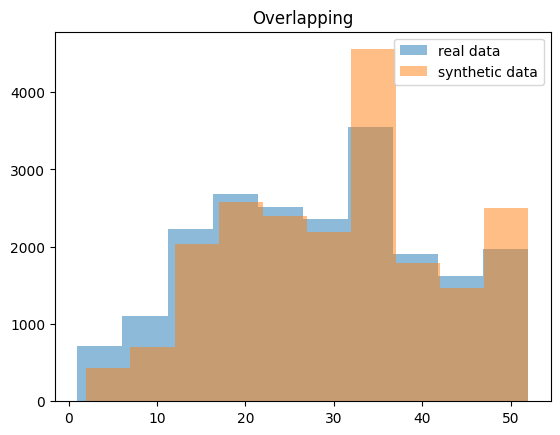

In [27]:
plt.hist(data['HouseAge'],
         alpha = 0.5,
         label='real data')

plt.hist(synthetic_data['HouseAge'],
         alpha = 0.5,
         label='synthetic data')

plt.legend(loc='upper right')
plt.title('Overlapping')
plt.show()

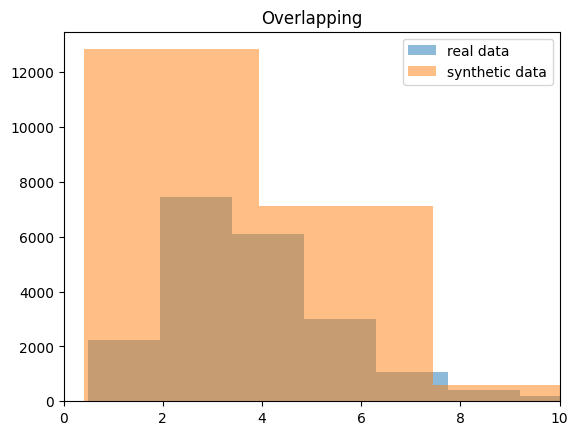

In [32]:
plt.hist(data['MedInc'],
         alpha = 0.5,
         label='real data')

plt.hist(synthetic_data['MedInc'],
         alpha = 0.5,
         label='synthetic data')

plt.legend(loc='upper right')
plt.title('Overlapping')
plt.xlim(0,10)
plt.show()

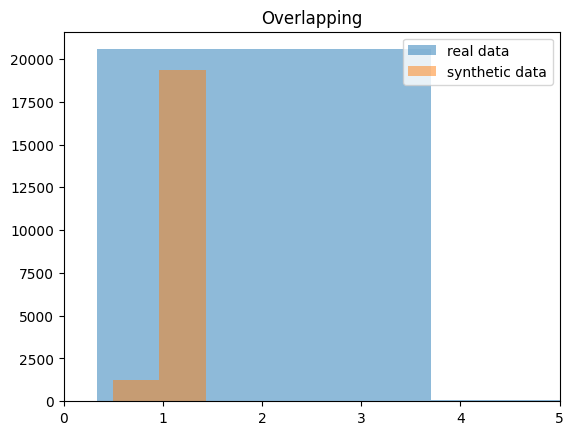

In [35]:
plt.hist(data['AveBedrms'],
         alpha = 0.5,
         label='real data')

plt.hist(synthetic_data['AveBedrms'],
         alpha = 0.5,
         label='synthetic data')

plt.legend(loc='upper right')
plt.title('Overlapping')
plt.xlim(0,5)
plt.show()

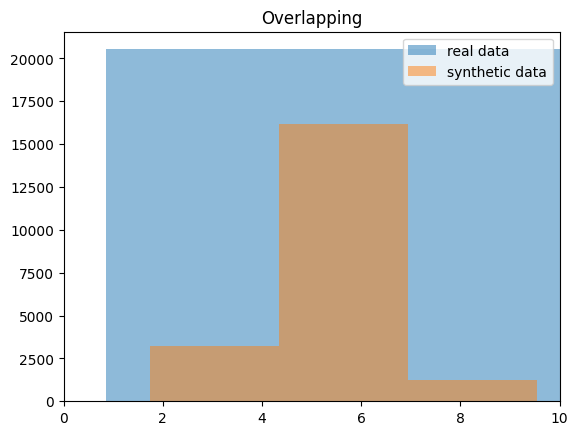

In [36]:
plt.hist(data['AveRooms'],
         alpha = 0.5,
         label='real data')

plt.hist(synthetic_data['AveRooms'],
         alpha = 0.5,
         label='synthetic data')

plt.legend(loc='upper right')
plt.title('Overlapping')
plt.xlim(0,10)
plt.show()

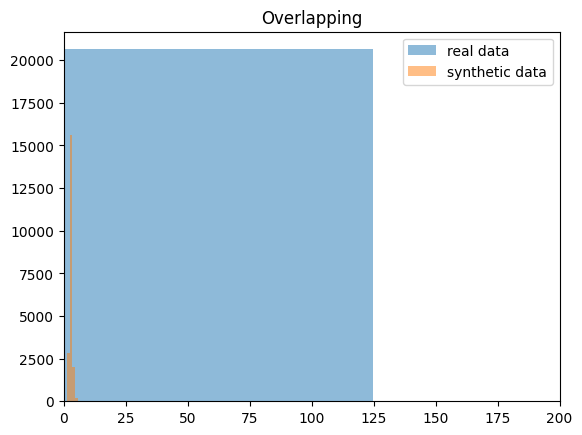

In [46]:
plt.hist(data['AveOccup'],
         alpha = 0.5,
         label='real data')

plt.hist(synthetic_data['AveOccup'],
         alpha = 0.5,
         label='synthetic data')

plt.legend(loc='upper right')
plt.title('Overlapping')
plt.xlim(0,200)
plt.show()

In [51]:
model.save('/contentsynth_test')

In [50]:
synthetic_data.to_csv("/contentsynth_results.csv")

In [ ]:
/content/loan_data.csv